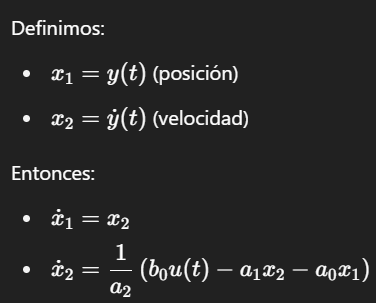

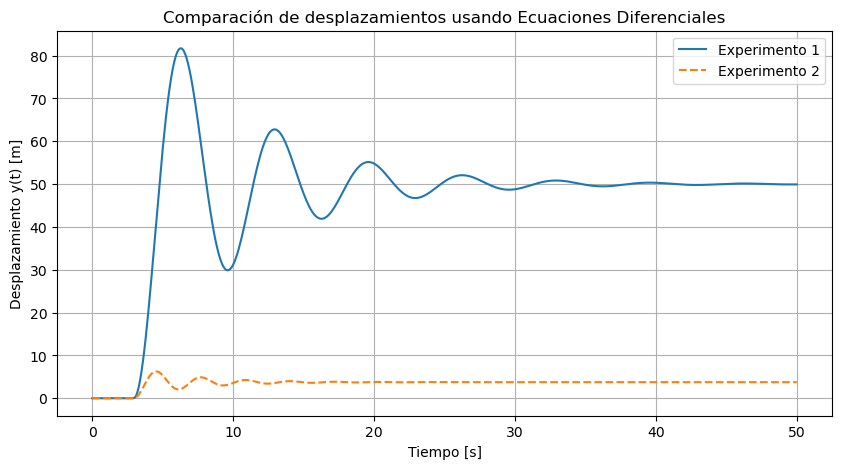

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

def simular_particula(a2, a1, a0, b0, time, u):
    """
    Simula el desplazamiento de una partícula usando solve_ivp
    """
    # Crear función de fuerza interpolada
    u_interp = interp1d(time, u, fill_value="extrapolate")

    # Sistema de ecuaciones
    def sistema(t, y):
        x1, x2 = y
        u_val = u_interp(t)
        dx1_dt = x2
        dx2_dt = (1/a2)*(b0*u_val - a1*x2 - a0*x1)
        return [dx1_dt, dx2_dt]

    # Condiciones iniciales
    y0 = [0, 0]

    # Resolver
    sol = solve_ivp(sistema, (time[0], time[-1]), y0, t_eval=time)

    return sol.t, sol.y[0]  # devuelve tiempo y posición

# Definir tiempo y entrada
time = np.arange(0, 50.1, 0.1)  # de 0 a 50s cada 0.1s
u = np.where(time >= 3, 5, 0)   # 5N después de 3 segundos

# Simular Experimento 1
t1, y1 = simular_particula(1.1, 0.3, 1, 10, time, u)

# Simular Experimento 2
t2, y2 = simular_particula(1, 0.5, 4, 3, time, u)

# Graficar ambas respuestas
plt.figure(figsize=(10, 5))
plt.plot(t1, y1, label='Experimento 1')
plt.plot(t2, y2, '--', label='Experimento 2')
plt.xlabel('Tiempo [s]')
plt.ylabel('Desplazamiento y(t) [m]')
plt.title('Comparación de desplazamientos usando Ecuaciones Diferenciales')
plt.legend()
plt.grid(True)
plt.show()


![Imagen de WhatsApp 2025-04-29 a las 12.38.37_df9685dc.jpg](<attachment:Imagen de WhatsApp 2025-04-29 a las 12.38.37_df9685dc.jpg>)
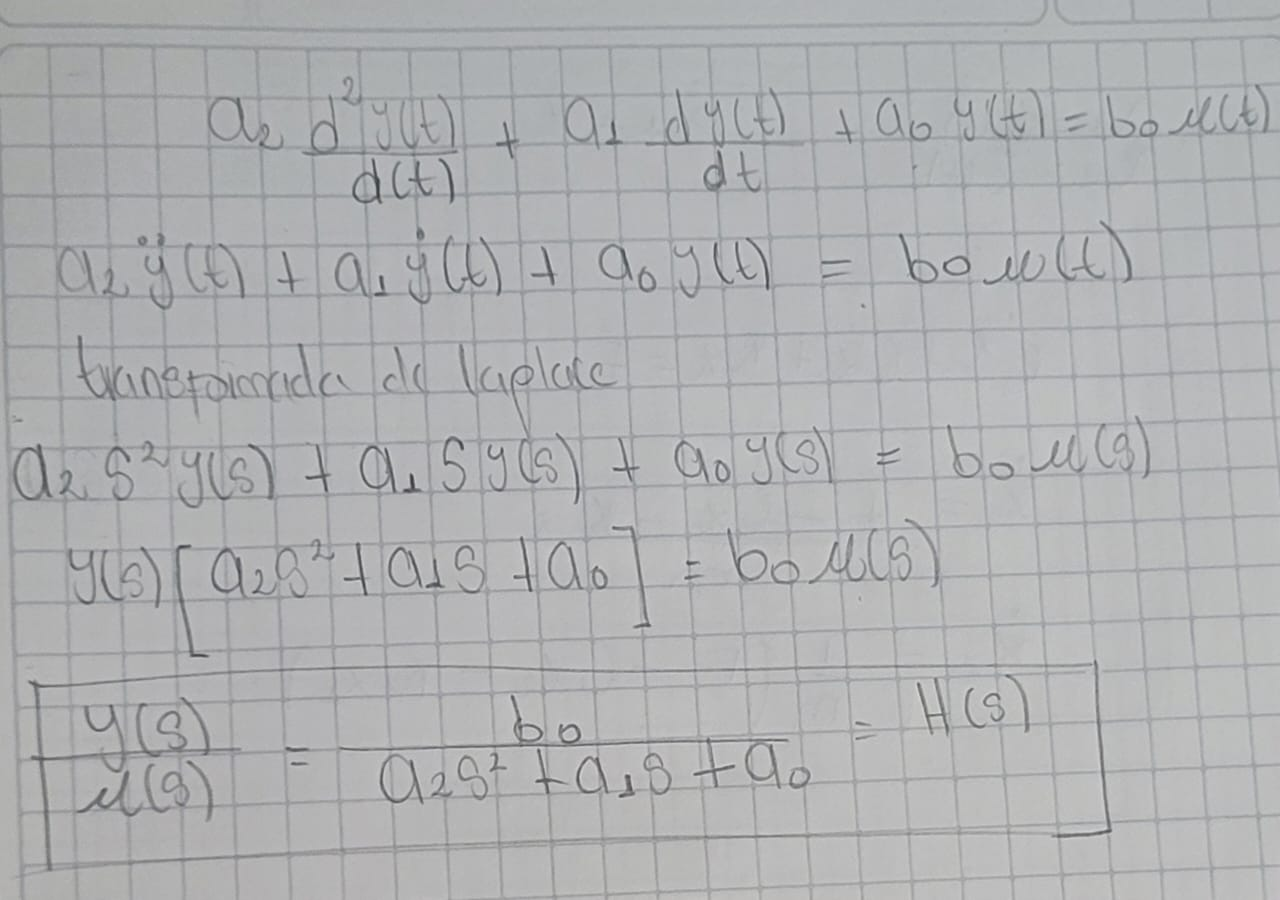

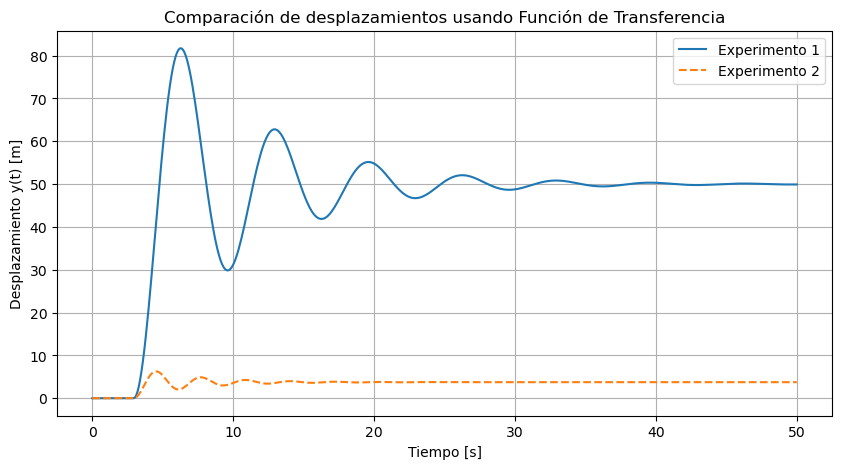

In [ ]:
from scipy.signal import TransferFunction, lsim

def simular_particula_tf(a2, a1, a0, b0, time, u):
    """
    Simula el desplazamiento de una partícula usando función de transferencia
    """
    num = [b0]
    den = [a2, a1, a0]

    # Crear sistema
    sistema = TransferFunction(num, den)

    # Simular
    t_out, y_out, _ = lsim(sistema, U=u, T=time)

    return t_out, y_out  # tiempo y posición

# Ya tenemos definidos time y u desde el punto anterior

# Simular Experimento 1
t1_tf, y1_tf = simular_particula_tf(1.1, 0.3, 1, 10, time, u)

# Simular Experimento 2
t2_tf, y2_tf = simular_particula_tf(1, 0.5, 4, 3, time, u)

# Graficar ambas respuestas usando función de transferencia
plt.figure(figsize=(10, 5))
plt.plot(t1_tf, y1_tf, label='Experimento 1')
plt.plot(t2_tf, y2_tf, '--', label='Experimento 2')
plt.xlabel('Tiempo [s]')
plt.ylabel('Desplazamiento y(t) [m]')
plt.title('Comparación de desplazamientos usando Función de Transferencia')
plt.legend()
plt.grid(True)
plt.show()


#En este método no controlamos condiciones iniciales distintas de... 
#...cero (por defecto son cero).

#lsim asume que el sistema está inicialmente en reposo...
#...(lo cual es consistente con el planteamiento original de este ejercicio).

In [3]:
# Revisión usando método de ecuaciones (solve_ivp)

# Máximo desplazamiento en cada experimento
max_y1 = np.max(y1)   # Experimento 1
max_y2 = np.max(y2)   # Experimento 2

print(f"Máximo desplazamiento Experimento 1: {max_y1:.2f} m")
print(f"Máximo desplazamiento Experimento 2: {max_y2:.2f} m")

# Evaluar cuál supera los 70 metros
if max_y1 >= 70:
    print("El Experimento 1 supera los 70 metros.")
else:
    print("El Experimento 1 no supera los 70 metros.")

if max_y2 >= 70:
    print("El Experimento 2 supera los 70 metros.")
else:
    print("El Experimento 2 no supera los 70 metros.")


Máximo desplazamiento Experimento 1: 81.72 m
Máximo desplazamiento Experimento 2: 6.26 m
El Experimento 1 supera los 70 metros.
El Experimento 2 no supera los 70 metros.


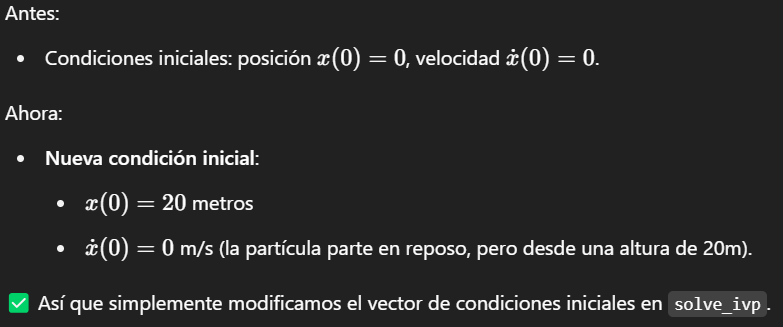

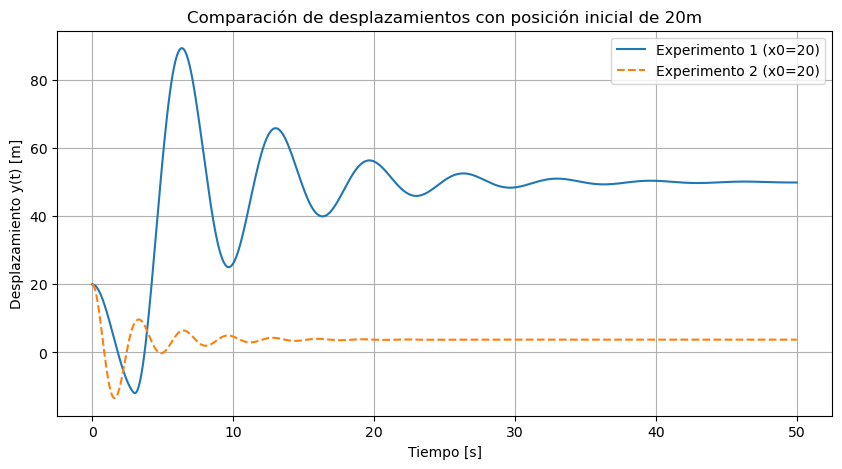

In [4]:
def simular_particula(a2, a1, a0, b0, time, u, y0=[0, 0]):
    """
    Simula el desplazamiento de una partícula usando solve_ivp
    y permitiendo condiciones iniciales personalizadas.
    """
    # Crear función de fuerza interpolada
    u_interp = interp1d(time, u, fill_value="extrapolate")

    # Sistema de ecuaciones
    def sistema(t, y):
        x1, x2 = y
        u_val = u_interp(t)
        dx1_dt = x2
        dx2_dt = (1/a2)*(b0*u_val - a1*x2 - a0*x1)
        return [dx1_dt, dx2_dt]

    # Resolver
    sol = solve_ivp(sistema, (time[0], time[-1]), y0, t_eval=time)

    return sol.t, sol.y[0]  # devuelve tiempo y posición

# Condiciones iniciales
y0_new = [20, 0]  # posición inicial 20m, velocidad inicial 0 m/s

# Simular Experimento 1 con nueva condición inicial
t1_20, y1_20 = simular_particula(1.1, 0.3, 1, 10, time, u, y0=y0_new)

# Simular Experimento 2 con nueva condición inicial
t2_20, y2_20 = simular_particula(1, 0.5, 4, 3, time, u, y0=y0_new)

plt.figure(figsize=(10, 5))
plt.plot(t1_20, y1_20, label='Experimento 1 (x0=20)')
plt.plot(t2_20, y2_20, '--', label='Experimento 2 (x0=20)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Desplazamiento y(t) [m]')
plt.title('Comparación de desplazamientos con posición inicial de 20m')
plt.legend()
plt.grid(True)
plt.show()
